In [30]:
from google.colab import files
uploaded = files.upload()

Saving energia_renovable_paises.csv to energia_renovable_paises.csv


In [31]:
import os
print(os.listdir())

['.config', 'energia_renovable_paises.csv', '.ipynb_checkpoints', 'sample_data']


In [32]:
!pip install pandas matplotlib seaborn

Resultados para China:
  Pendiente (Crecimiento por año): -3600.00 USD Millones
  Intercepto: 7360880.00 USD Millones
  Error Cuadrático Medio (MSE): 290345600.00
  Coeficiente de Determinación (R²): 0.08

Resultados para Estados Unidos:
  Pendiente (Crecimiento por año): 2490.00 USD Millones
  Intercepto: -4972050.00 USD Millones
  Error Cuadrático Medio (MSE): 13097400.00
  Coeficiente de Determinación (R²): 0.49

Resultados para Europa:
  Pendiente (Crecimiento por año): 1300.00 USD Millones
  Intercepto: -2565740.00 USD Millones
  Error Cuadrático Medio (MSE): 15938400.00
  Coeficiente de Determinación (R²): 0.17



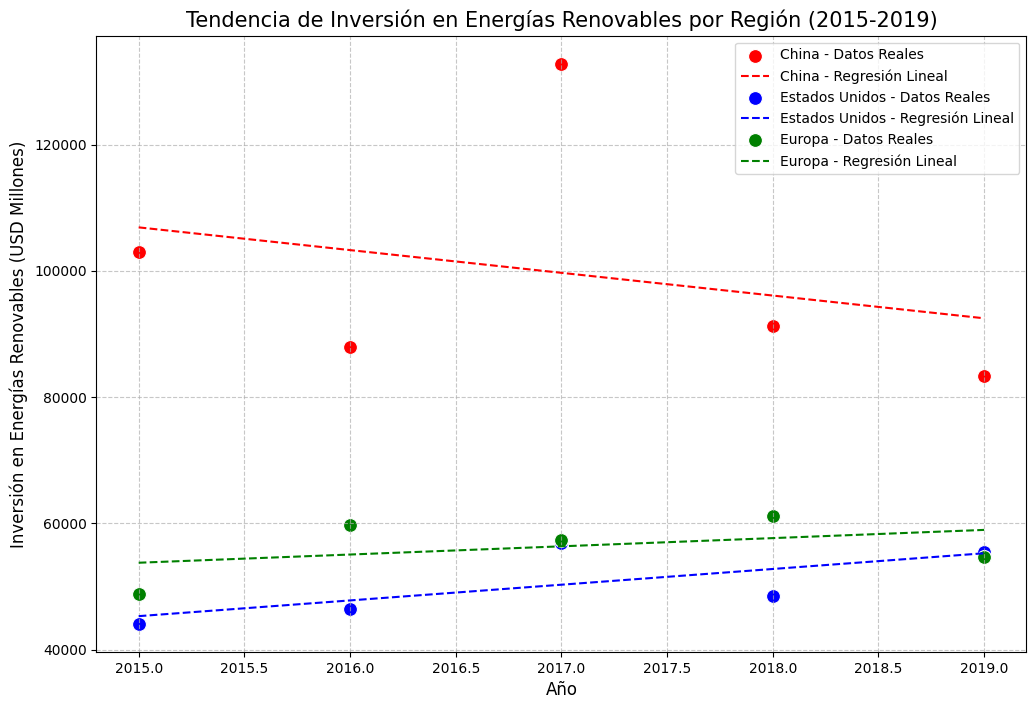

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Datos de inversión en energías renovables
data = {
    'Año': [2015, 2016, 2017, 2018, 2019],
    'China': [103000, 88000, 132800, 91200, 83400],
    'Estados Unidos': [44100, 46400, 56900, 48500, 55500],
    'Europa': [48800, 59800, 57400, 61200, 54600]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Configuración del gráfico
plt.figure(figsize=(12, 8))

# Colores para cada región
colores = {'China': 'red', 'Estados Unidos': 'blue', 'Europa': 'green'}

# Análisis y gráficos para cada región
for region in ['China', 'Estados Unidos', 'Europa']:
    X = df[['Año']]
    y = df[region]

    # Crear y ajustar el modelo de regresión lineal
    modelo = LinearRegression()
    modelo.fit(X, y)

    # Predecir valores
    y_pred = modelo.predict(X)

    # Gráfico de dispersión y línea de regresión
    sns.scatterplot(x=df['Año'], y=y, color=colores[region], s=100, label=f'{region} - Datos Reales')
    plt.plot(df['Año'], y_pred, color=colores[region], linestyle='--', label=f'{region} - Regresión Lineal')

    # Métricas de evaluación
    pendiente = modelo.coef_[0]
    intercepto = modelo.intercept_
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f'Resultados para {region}:')
    print(f'  Pendiente (Crecimiento por año): {pendiente:.2f} USD Millones')
    print(f'  Intercepto: {intercepto:.2f} USD Millones')
    print(f'  Error Cuadrático Medio (MSE): {mse:.2f}')
    print(f'  Coeficiente de Determinación (R²): {r2:.2f}\n')

# Personalizar el gráfico
plt.title('Tendencia de Inversión en Energías Renovables por Región (2015-2019)', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Inversión en Energías Renovables (USD Millones)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
